# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [ ]:
#'M10.csv'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedFormatter, FixedLocator

In [5]:
prev_rend = pd.read_csv('M10.csv')
prev_rend

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [13]:
prev_rend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [39]:
prev_rend = prev_rend.dropna()
prev_rend = prev_rend.drop(columns=['Unnamed: 0', 'index'], axis=1)

In [41]:
previsao_de_renda = prev_rend.select_dtypes(include=[np.number])
previsao_de_renda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12466 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   qtd_filhos             12466 non-null  int64  
 1   idade                  12466 non-null  int64  
 2   tempo_emprego          12466 non-null  float64
 3   qt_pessoas_residencia  12466 non-null  float64
 4   renda                  12466 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 584.3 KB


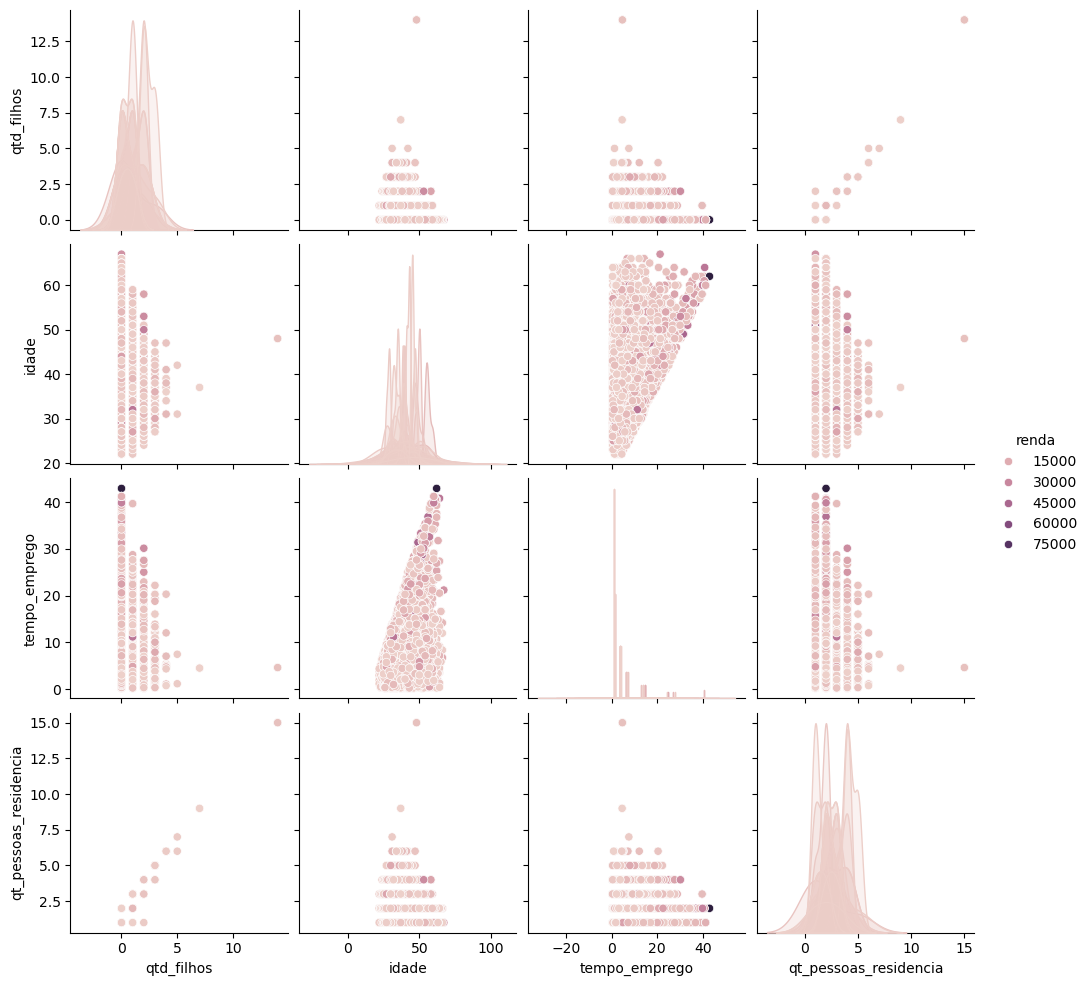

In [47]:
sns.pairplot(previsao_de_renda, hue='renda')

Na análise das variáveis, observou-se que, embora seja lógico esperar que o número de filhos aumente com a idade, os dados sugerem uma tendência contrária, com uma redução no número de filhos em indivíduos acima de 50 anos. Esse fenômeno é corroborado pelo gráfico que relaciona 'qtd_filhos' e 'tempo_emprego', onde se observa que pessoas com mais tempo de emprego tendem a ter menos filhos. Em ambos os casos, há uma correlação negativa, contrariando a expectativa inicial.

Por outro lado, o gráfico de dispersão que examina a relação entre 'qtd_filhos' e 'qt_pessoas_residencia' confirma um padrão esperado: há uma correlação positiva clara, onde famílias com um maior número de filhos também tendem a ter mais pessoas na residência, o que é consistente com a lógica demográfica.

Além disso, as análises indicam que não há correlação significativa entre as variáveis 'idade' e 'qt_pessoas_residencia', nem entre 'tempo_emprego' e 'qt_pessoas_residencia'.

Por fim, os gráficos revelam que as faixas de renda mais elevadas estão associadas a indivíduos com mais tempo de emprego e maior idade, sugerindo uma correlação positiva entre essas variáveis.

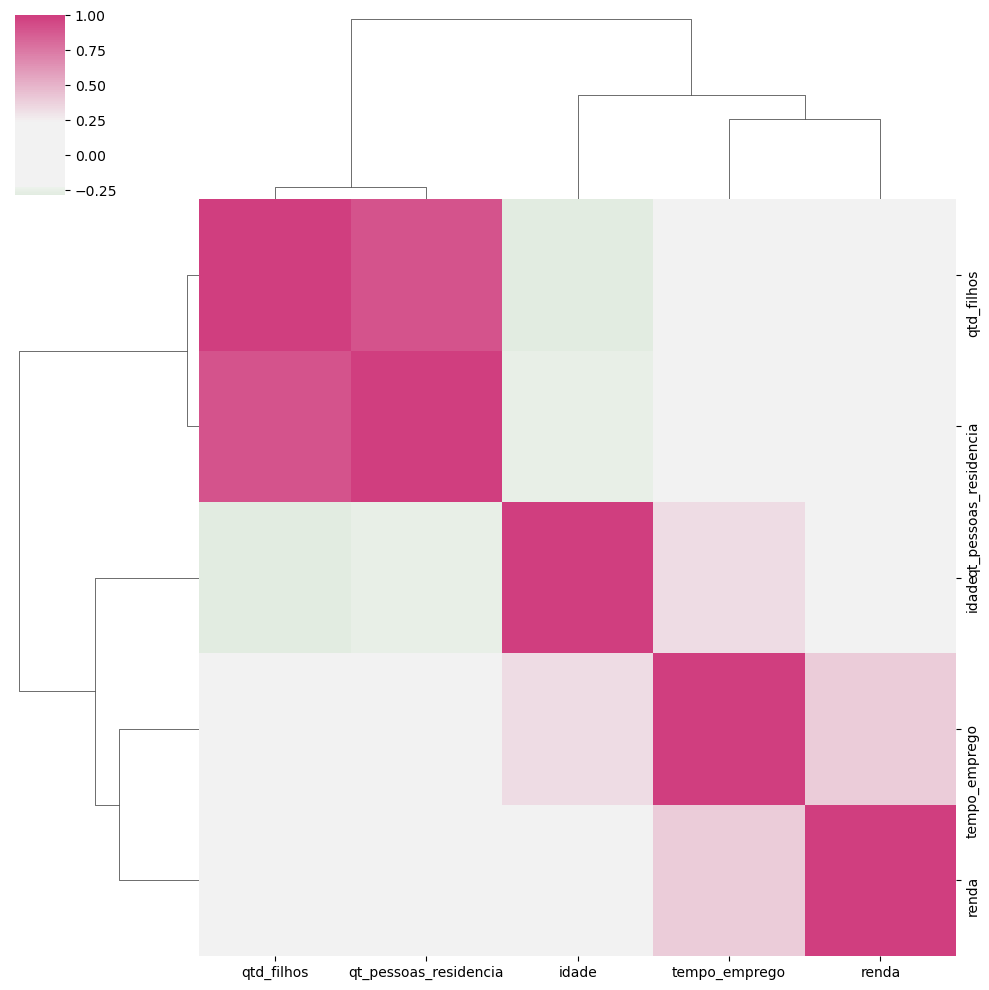

In [49]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(previsao_de_renda.corr(), figsize=(10, 10), center = 0, cmap=cmap)

O agrupamento das variáveis idade e tempo_emprego confirma a forte relação entre essas variáveis, refletindo a tendência de que, conforme a idade aumenta, o tempo de emprego também aumenta.

Além dessa confirmação, a análise também revela uma correlação moderada entre tempo_emprego e renda, sugerindo que, à medida que o tempo de emprego aumenta, a renda tende a aumentar, embora não de maneira tão forte quanto outras relações observadas.

Por outro lado, há correlações negativas entre idade e qt_pessoas_residencia e entre idade e qtd_filhos, indicando que indivíduos mais velhos tendem a viver em lares com menos pessoas e a ter menos filhos. A correlação positiva entre qt_pessoas_residencia e qtd_filhos também é confirmada, reforçando a expectativa de que famílias com mais filhos geralmente têm mais pessoas na residência. 

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

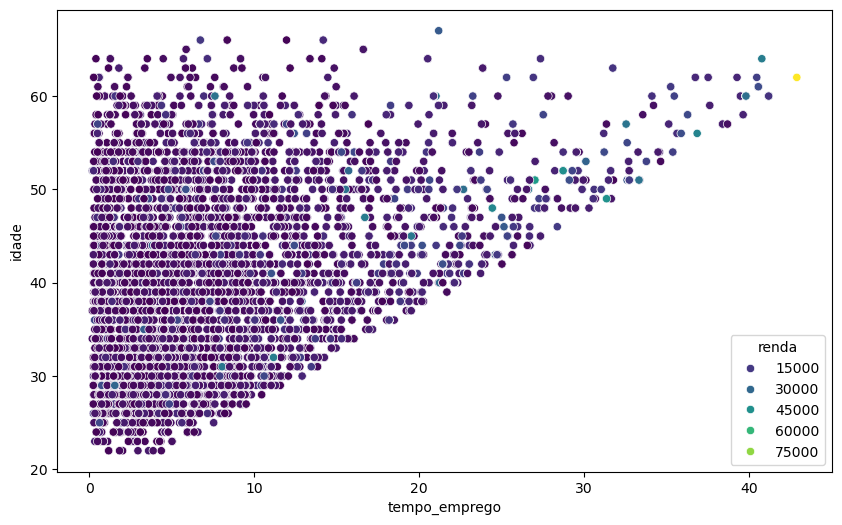

In [87]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo_emprego', y='idade', hue='renda', data=previsao_de_renda, palette='viridis')
plt.show()

As variáveis com relações mais fortes com a renda são a 'idade' e o 'tempo_emprego'. Percebe se que existem uma grande concentração de individuos até aproximadamente 5 anos de emprego e observamos maiores rendas no quadrante onde maior idade e maior tempode emprego se encontram.

3) Na su aopinião, há outliers na variável renda?

In [68]:
previsao_de_renda['renda'].describe()

count    12466.000000
mean      4850.045256
std       4873.182512
min        159.900000
25%       2026.390000
50%       3422.440000
75%       5916.970000
max      89918.040000
Name: renda, dtype: float64

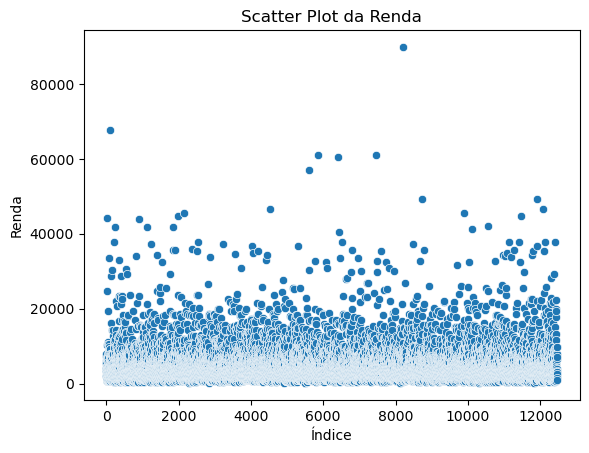

In [89]:
sns.scatterplot(x=range(len(previsao_de_renda['renda'])), y='renda', data=previsao_de_renda)
plt.title("Scatter Plot da Renda")
plt.xlabel("Índice")
plt.ylabel("Renda")
plt.show()

Sim, o gráfico revela pelo menos 2 outliers.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

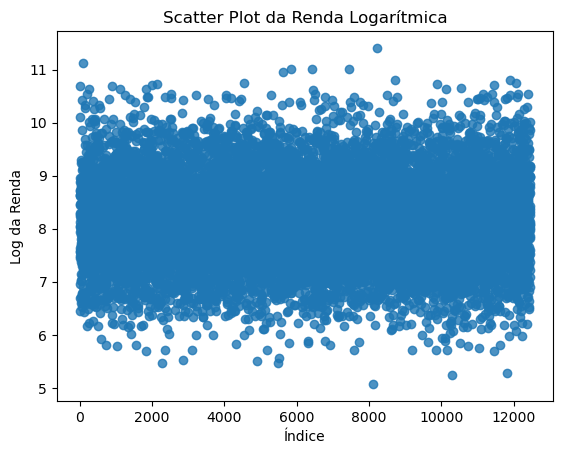

In [110]:
previsao_de_renda_log = previsao_de_renda.copy()
previsao_de_renda_log['log_y'] = np.log(previsao_de_renda_log['renda'])

# Criando a sequência de índices para o eixo x
x_values = np.arange(len(previsao_de_renda_log))

# Criando o gráfico de regressão
sns.regplot(x=x_values, y='log_y', data=previsao_de_renda_log)

plt.title("Scatter Plot da Renda Logarítmica")
plt.xlabel("Índice")
plt.ylabel("Log da Renda")
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Este gráfico sugere que, ao transformar a renda para a escala logarítmica, obteve-se uma distribuição mais uniforme, permitindo uma visualização mais clara da concentração de valores e de outliers. A ausência de um padrão específico ao longo do eixo x (índice) indica que a transformação logarítmica conseguiu linearizar a relação, tornando o gráfico útil para identificar a faixa mais comum de renda e possíveis exceções (outliers).